# Addition by Quantum Fourier Transform

In [2]:
import qiskit as qi
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.providers.aer import Aer


In [4]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


In [7]:
def A(y, qubits):
    qFTs = qi.QuantumCircuit(qubits)
    qFTs = qFTs.compose(QFT(qubits, inverse = False), np.arange(0,qubits,1))
    swap_registers(qFTs,3)
    for k in range(qubits):
        par = (2*np.pi*y)/(2**(k+1))
        qFTs.p(par,k)
        qFTs.barrier()
    swap_registers(qFTs,3)
    qFTs = qFTs.compose(QFT(qubits, inverse = True), np.arange(0,qubits,1))

    return qFTs

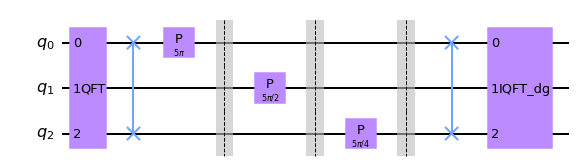

In [12]:
qFTs = A(5,3)
qFTs.draw('mpl')

In [19]:
state1 = qi.quantum_info.Statevector.from_label('000')
state1 = state1.evolve(qFTs)
state1.draw(output = 'latex')

<IPython.core.display.Latex object>

In [18]:
state2 = qi.quantum_info.Statevector.from_label('101')
state2 = state2.evolve(qFTs)
state2.draw(output = 'latex')

<IPython.core.display.Latex object>